In [1]:
import os
import tarfile
import matplotlib.pyplot as plt
import pandas as pd
import torch
from pathlib import Path
from NeuralNMF import train
from NeuralNMF import Neural_NMF
import pickle
import scipy.io
import random
import numpy as np


np.random.seed(0)
random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

In [57]:
mat_data = scipy.io.loadmat(r"C:\Users\ASUS\Downloads\For_Tezuka\For_Tezuka\Opto_Data_CLa13.mat")

In [58]:
trainS = mat_data["S"][0][0]

In [4]:
trainS = torch.tensor(trainS)

In [59]:
type(trainS)

numpy.ndarray

In [70]:
trainData = []

In [71]:
for i in range(trainS.shape[1]-7):
    segment = trainS[:,i:i+8]
    flatt = segment.flatten(order='F')
    trainData.append(flatt)

trainMatrix = np.array(trainData).T

In [72]:
trainMatrix.shape

(808, 5950)

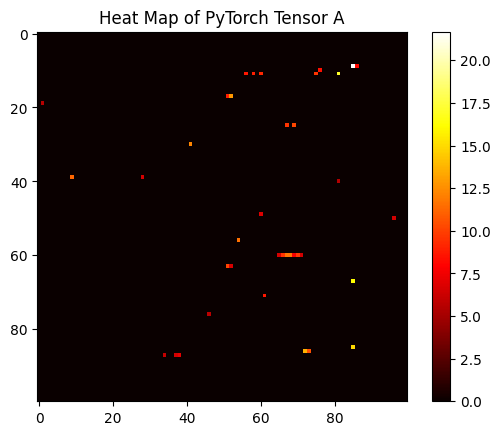

In [135]:
plt.imshow(trainMatrix[500:600,900:1000], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()

In [73]:
trainMatrix = torch.tensor(trainMatrix)

In [92]:
m, k1 = 808, 2
net = Neural_NMF([m, k1])

In [93]:
history = train(net, trainMatrix, epoch=10, lr=500, supervised=False)

100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


In [94]:
A = history[0][0]
S = history[1][0]

In [95]:
A.shape

torch.Size([808, 2])

In [96]:
S.shape

torch.Size([2, 5950])

In [105]:
A1 = A.detach().numpy()
S1 = S.detach().numpy()

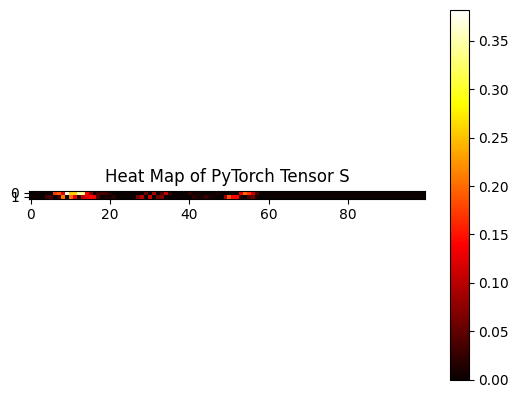

In [106]:
i = 4301
plt.imshow(S1[:,i:i+100], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

In [119]:
A1 = torch.tensor(A1)

In [120]:
threshold_value = 0.5
result = torch.clamp(A1, min=threshold_value)


In [121]:
A1 = A1.detach().numpy()

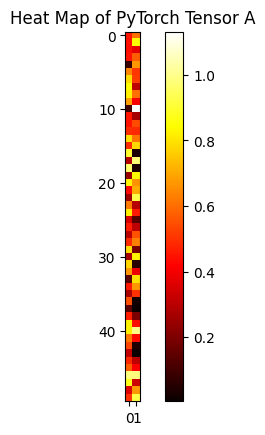

In [123]:
i = 100
plt.imshow(A1[:50,:], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()

In [111]:
A1.shape

(808, 2)

In [107]:
A__ = A1[:,1]

In [109]:
A_ = A1[:,1]

In [112]:
A_ = A_.reshape(101,8)

In [114]:
A_.shape

(101, 8)

In [115]:
A1[:,1][10]

1.131498312461084

In [116]:
A_[1,0]

0.6066676564282129

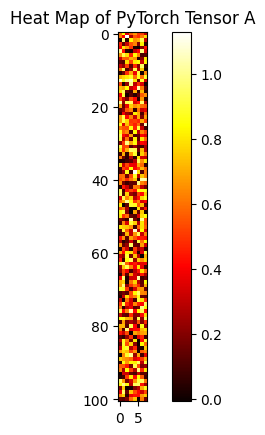

In [118]:
plt.imshow(A_, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()

In [ ]:
for x in range(8):
    A__ = A1[:,x]
    A__ = A__.reshape(101,8)
    plt.imshow(A__, cmap='hot', interpolation='nearest')
    plt.colorbar()  # Show color scale
    plt.title('Heat Map of PyTorch Tensor A')
    plt.show()

In [124]:
type(A1)

numpy.ndarray

In [129]:
A1 = A1.reshape(1,-1)

In [130]:
A1.shape

(1, 1616)

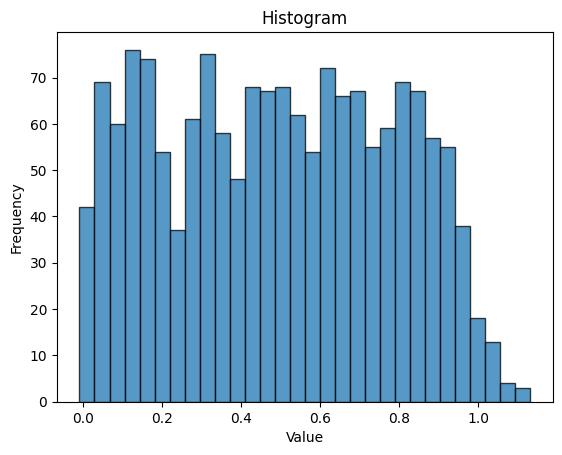

In [134]:
plt.hist(A1.T, bins=30, alpha=0.75, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()